<center>
<h1>Supervised Learning Final Project - A Comparative Study of Random Forest and SVM Models</h1>
<h3> Author: Wenhao Chen<h3>
<h3>UCI ML data repository: <a href="https://archive.ics.uci.edu/dataset/389/devanagari+handwritten+character+dataset">devanagari handwritten character dataset</a></h3>
</center>



<h3>Data Understand </h3>

This is an image database of Handwritten Devanagari characters. It contains handwritten samples of <a href="https://en.wikipedia.org/wiki/Devanagari">Devanagari</a> script, which is widely used in Indian languages such as Hindi, Sanskrit, Marathi, and Nepali. Recognizing specific characters can enhance the accuracy of computer vision programs, and the resulting technology can be applied to translation, text-to-speech, and accessibility tools.

> There are 46 classes of characters with 2000 examples each. The dataset is split into training set(85%) and testing set(15%)<br>
> No missing Values

	•	Total Classes: 46
	•	36 characters (अ–ज्ञ, etc.)
	•	10 numerals (०–९)
	•	Total Samples: ~92,000 images
	•	Image Size: 32 × 32 pixels (grayscale)
	•	Format: Each sample is labeled with the corresponding character/numeral.
    •	Store:
        thisfile.ipynb
        dataset/
             ├── train/
             │    ├── digit_0/
             │    │     ├── img1.png
             │    │     ├── img2.png
             │    ├── digit_1/
             │    ├── character_1_ka/
             │    ├── character_2_kha/
             │    └── ...
             ├── test/
             │    ├── digit_0/
             │    ├── digit_1/
             │    ├── character_1_ka/
             │    ├── character_2_kha/
             │    └── ...

<h3>Identifying a Supervised Machine Learning Problem</h3>

this is Multiclass Classification Supervised Learning Problem<br>
input is handwritten grayscale images of size 32×32. output is one of 46 possible labels

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_files
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
path = "./DevanagariHandwrittenCharacterDataset/"
testpath = f"{path}test"
trainpath = f"{path}train"


<h3>EDA:</h3>


In [3]:
def load_images_from_folder(folder, img_size=32):
    data = load_files(folder)
    file_paths = np.array(data['filenames'])
    target = np.array(data['target'])
    target_names = data['target_names']

    images = []
    for f in file_paths:
        img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        images.append(img.flatten())
    
    return np.array(images), target, target_names


def view_image(image, label=None, classname=None):
    """
    function to plot digit examples 
    """
    image = image.reshape(32, 32)   
    label = label                   
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label} ({classname})")
    plt.axis("off")
    plt.show()

In [4]:
train, target, targetnames = load_images_from_folder(trainpath)
test, testtarget, _ = load_images_from_folder(testpath)

In [8]:
print(target, targetnames)
labeltrans = {i:name.split('_')[-1] for i, name in enumerate(targetnames)}

print(labeltrans)

[15 26  0 ... 25 25 40] ['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
{0: 'yna', 1: 'taamatar', 2: 'thaa', 3: 'daa', 4: 'dhaa', 5: 'adna', 6: 'tabala', 7: 'tha', 8: 'da', 9: 'dha', 10: 'ka', 11: 'na', 1

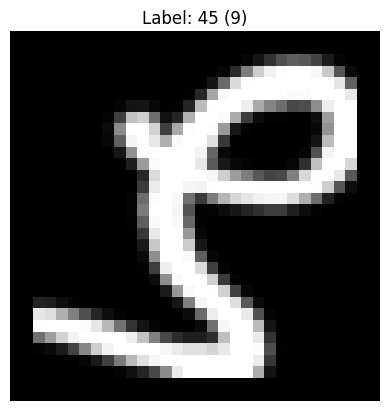

In [10]:
view_image(train[31], target[31], labeltrans[target[31]])

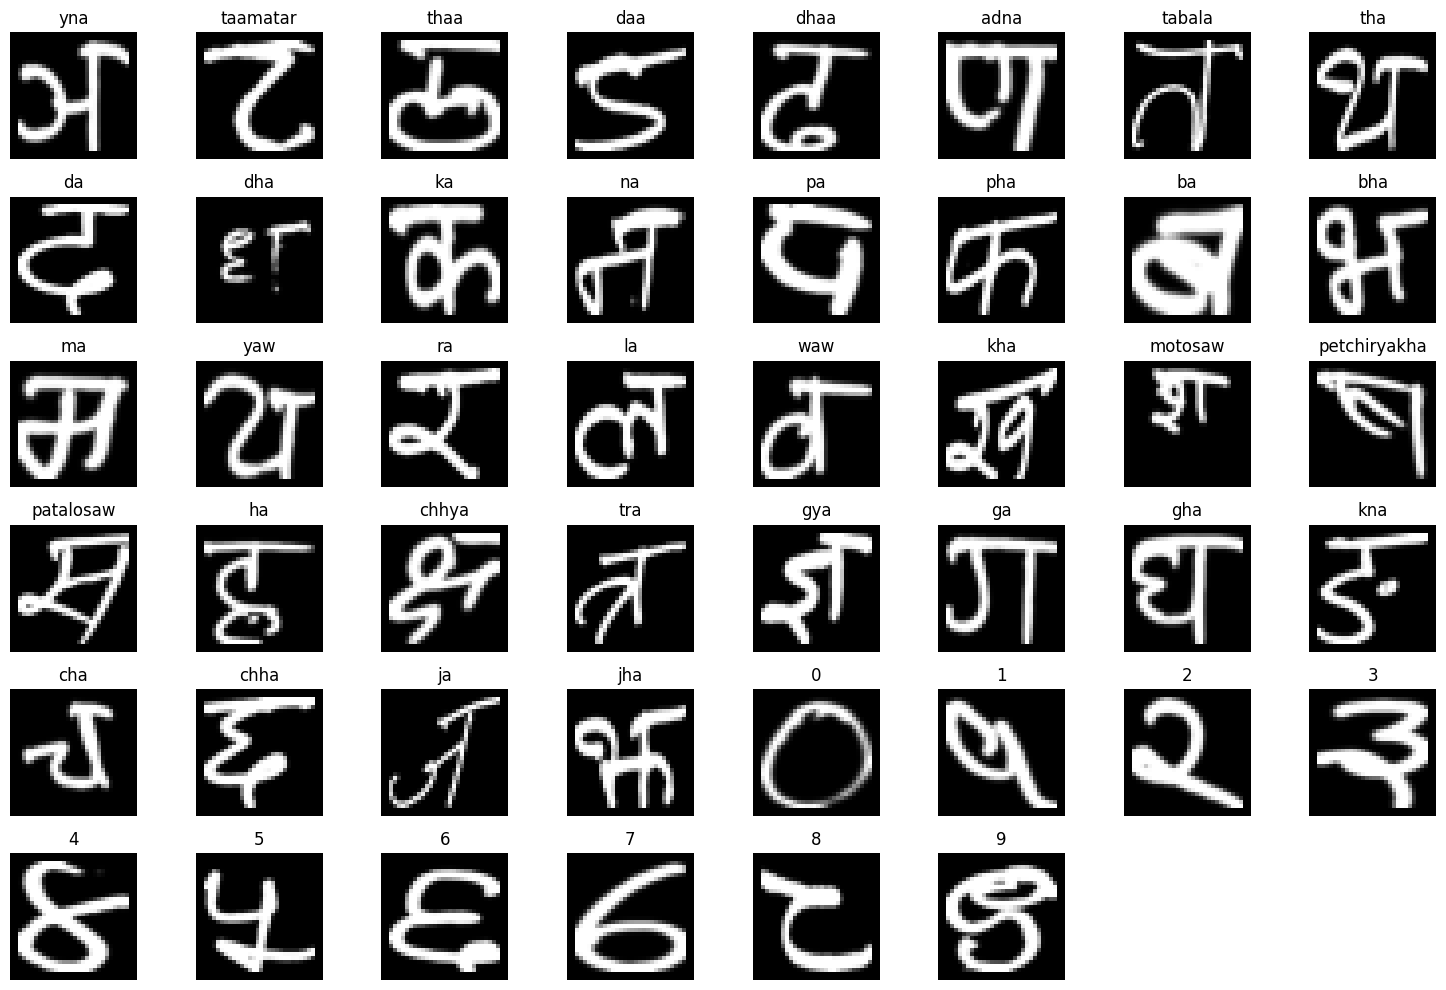

In [18]:
unique_classes = np.unique(target)
indices = [np.random.choice(np.where(target == cls)[0]) for cls in unique_classes]
plt.figure(figsize=(15, 10)) 


for i, idx in enumerate(indices):
    image = train[idx].reshape(32, 32)
    label = target[idx]
    
    plt.subplot(6, 8, i+1)   
    plt.imshow(image, cmap="gray")
    plt.title(labeltrans[label], fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()

from the cell above, i plot one of each from 46 type 

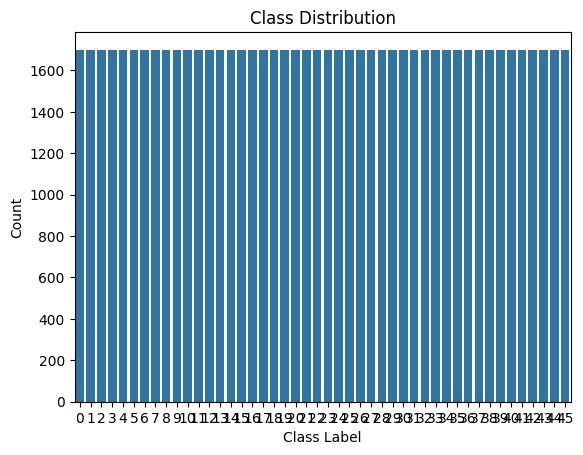

In [17]:
sns.countplot(x=target)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

<h3>Fit Model</h3>
the Data is Banlanced, so we don't need to apply SMOTE. 
<h5> AdaBoost</h5>

In [58]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=114514), n_estimators=200, random_state=114514)
ada.fit(train, target)

y_pred_ada = ada.predict(test)
print("AdaBoost Accuracy:", accuracy_score(testtarget, y_pred_ada))


AdaBoost Accuracy: 0.2086231884057971


The accuracy of the model is 0.21, which aligns with my expectations. This result is reasonable given that AdaBoost is a relatively simple ensemble method that works by sequentially combining multiple weak learners. typically shallow decision trees—to gradually improve performance. Its simplicity and reliance on weak classifiers often lead to modest accuracy, especially when applied to complex datasets.

<h5>random forest</h5>
using the GridSearchCV search the best hyperparameter for this dataset(a lot of output in this cell. so i comment it).
and we have best parameter: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
"""
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [15, 25, 35],
    "max_features": ["sqrt", "log2"]
} 
#Best params: {'max_depth': 25, 'max_features': 'log2', 'n_estimators': 500}
rf = RandomForestClassifier(random_state=114514, n_jobs=-1)

grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=1, verbose=2)
grid.fit(train, target)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
print("Test accuracy:", grid.score(test, testtarget))
"""


In [81]:

rf = RandomForestClassifier(
    n_estimators=500,   
    max_depth=25,
    max_features="sqrt",
    n_jobs=-1,          
    random_state=114514
)
rf.fit(train, target)


RandomForestClassifier(max_depth=25, n_estimators=500, n_jobs=-1,
                       random_state=114514)

In [82]:
y_trainpred = rf.predict(train)
print("Random Forest Accuracy:", accuracy_score(target, y_trainpred))

Random Forest Accuracy: 1.0


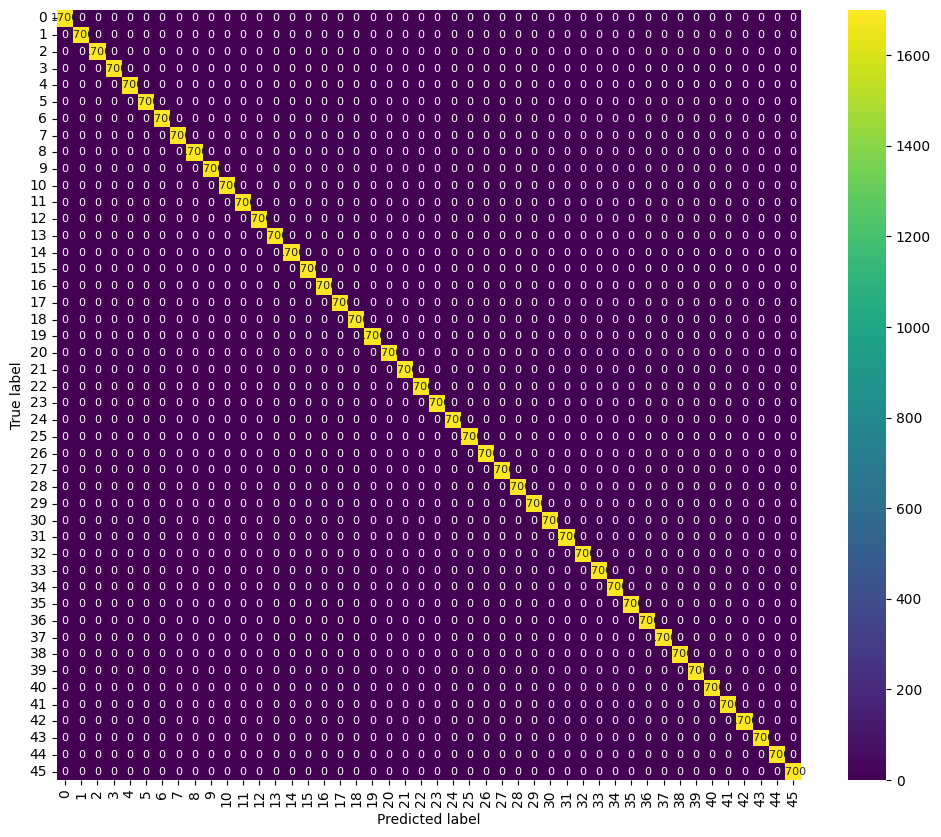

In [83]:
conf_matrix = confusion_matrix(target, y_trainpred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [84]:
test1 = y_trainpred[y_trainpred == 0]
len(test1)

1700

The Random Forest model fit the training data exceptionally well, achieving a perfect accuracy score of 1.0. This indicates that the ensemble of decision trees was able to capture all patterns and distinctions within the training set without any misclassifications. While such a result demonstrates the model’s strong learning capacity, it may also suggest potential overfitting: especially if the test accuracy is significantly lower, since perfect performance on training data doesn't always translate to generalization on unseen data.

Random Forest Accuracy: 0.9249275362318841


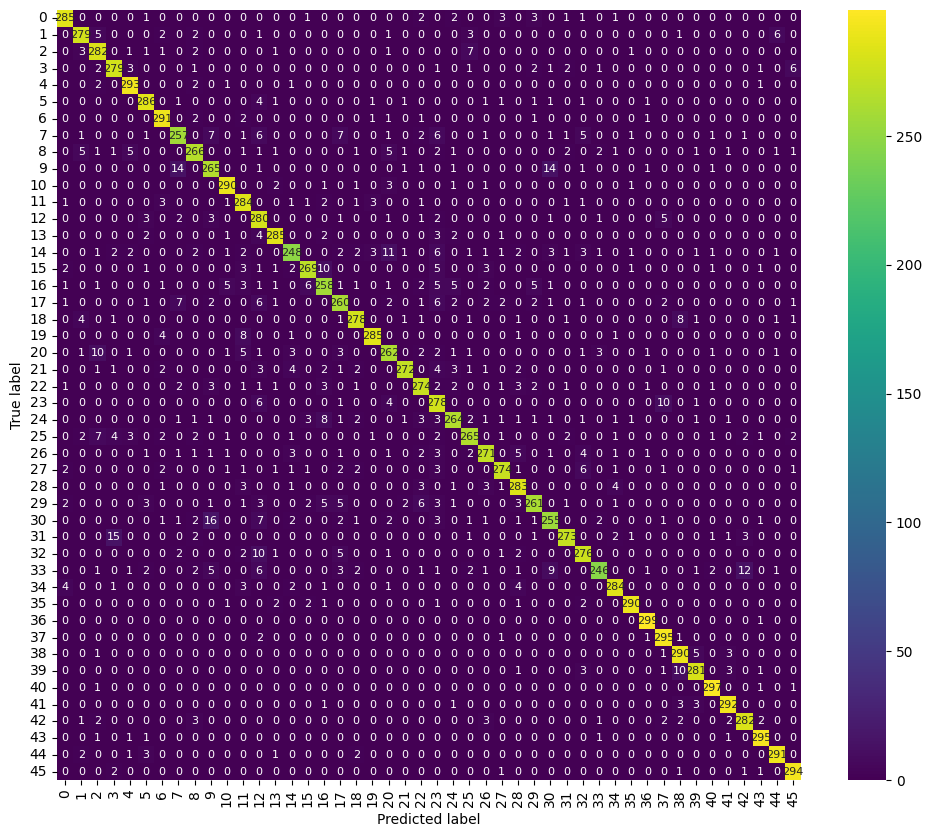

In [67]:

y_testpred = rf.predict(test)
print("Random Forest Accuracy:", accuracy_score(testtarget, y_testpred))
test_matrix = confusion_matrix(testtarget, y_testpred)

plt.figure(figsize=(12, 10))
sns.heatmap(test_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [71]:
mse = mean_squared_error(testtarget, y_testpred)
print("MSE:", mse)

print(classification_report(testtarget, y_testpred))

MSE: 18.864202898550726
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       300
           1       0.94      0.93      0.93       300
           2       0.89      0.94      0.91       300
           3       0.91      0.93      0.92       300
           4       0.94      0.98      0.96       300
           5       0.93      0.95      0.94       300
           6       0.94      0.97      0.95       300
           7       0.89      0.86      0.87       300
           8       0.92      0.89      0.90       300
           9       0.87      0.88      0.88       300
          10       0.95      0.97      0.96       300
          11       0.89      0.95      0.92       300
          12       0.81      0.93      0.87       300
          13       0.95      0.95      0.95       300
          14       0.92      0.83      0.87       300
          15       0.94      0.90      0.92       300
          16       0.88      0.86      0.87       300
   

<H3> Result on RandomForest</H3>

1. Overall Model Performance<br>
	•	Accuracy: ~92.5% — the model correctly predicts about 9 out of 10 characters.<br>
	•	F1-score (macro & weighted): ~0.92–0.93 — strong balance between precision and recall across classes.<br>
	•	MSE: ~18.86 — on average, there are misclassification errors, but since MSE is less interpretable in classification, it shows the model is not perfect.<br>

Conclusion: The Random Forest provides high and stable performance, showing it is a strong baseline model.<br>


2. Class-wise Observations

Looking at precision, recall, and F1 per class:<br>
	•	Strong classes (≥0.95 F1): digits (0, 4, 6, 10, 13, 19, 34–45) → model distinguishes these well.<br>
	•	Weaker classes (~0.85–0.90 F1): e.g., 7 (chha), 9 (jha), 12 (thaa), 14 (dhaa), 16 (tabala), 17 (tha), 20 (na), 23 (ba), 30 (motosaw), 33 (ha) → these characters are harder to classify, often confused with similar-looking symbols.<br>

These weaker classes likely share visual similarities with other characters, leading to misclassifications.<br>


3. Interpretation of Errors<br>
	•	High accuracy but not perfect → RF slightly struggles with fine grained visual distinctions.<br>
	•	MSE is non-zero → indicates presence of mislabels or characters with overlapping patterns.<br>


The Random Forest classifier achieved an overall accuracy of 92.5% with a macro-average F1-score of 0.92, showing strong performance on the Devanagari handwritten character dataset. Most classes, especially the digits and several core characters, were classified with high precision and recall (>95%). However, some visually similar characters such as jha, thaa, and dhaa were more challenging, with F1-scores around 0.85–0.90, suggesting frequent misclassifications. The mean squared error (18.86) further indicates that while the model performs well,

<h3>SVM</h3>


In [29]:
param_grid = {
    'loss': ['hinge', 'log_loss'],       
    'alpha': [1e-4, 1e-3, 1e-2],     
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['optimal', 'adaptive'],  
    'eta0': [0.001, 0.01, 0.1]
}
scaler = StandardScaler()
sgd = SGDClassifier(random_state=114514, max_iter=1000, tol=1e-3)
grid = GridSearchCV(
    sgd,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
grid.fit(train_scaled[:10000], target[:10000])  

print("Best params:", grid.best_params_)

#Best params: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best params: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l2'}
[CV] END alpha=0.0001, eta0=0.001, learning_rate=optimal, loss=log_loss, penalty=l2; total time= 1.1min
[CV] END alpha=0.0001, eta0=0.001, learning_rate=optimal, loss=log_loss, penalty=elasticnet; total time= 1.8min
[CV] END alpha=0.0001, eta0=0.001, learning_rate=adaptive, loss=log_loss, penalty=l2; total time=  41.5s
[CV] END alpha=0.0001, eta0=0.001, learning_rate=adaptive, loss=log_loss, penalty=elasticnet; total time= 1.0min
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, penalty=elasticnet; total time= 1.6min
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, penalty=l2; total time=  25.3s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, penalty=l1; total time=  52.4s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=log_loss, penalty=l2;

In [30]:
svcmodel = grid.best_estimator_
svcmodel.fit(train, target)
svctrainpred = svcmodel.predict(train)
print("svc Accuracy:", accuracy_score(target, svctrainpred))

svc Accuracy: 0.6970460358056266


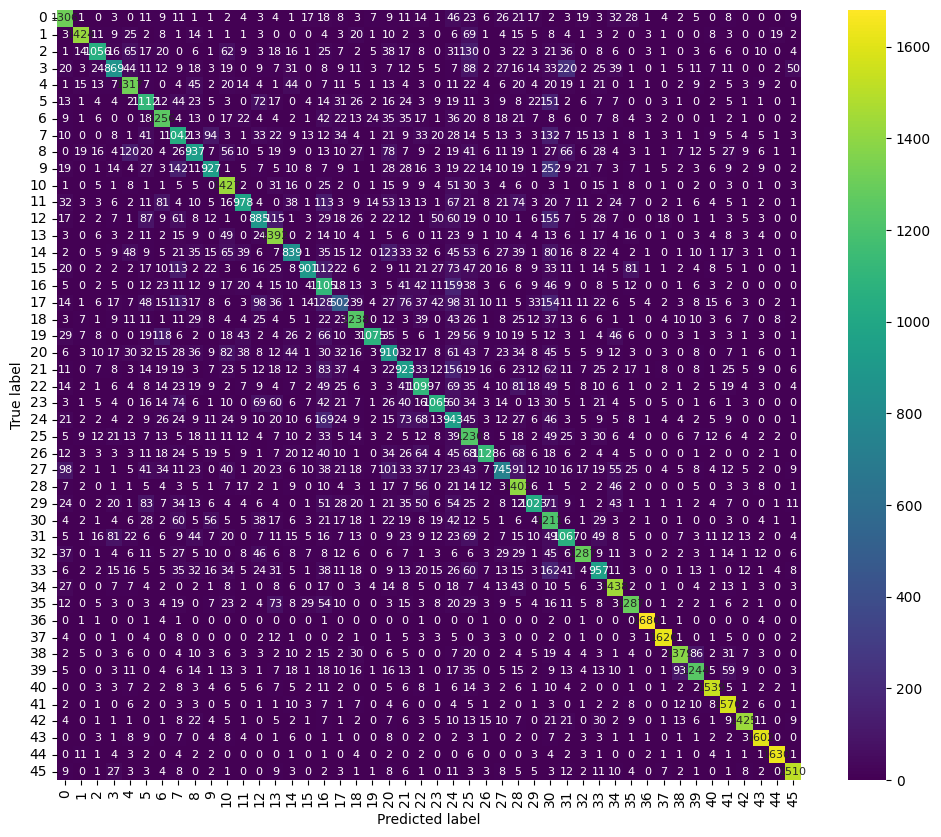

In [31]:

svctrain_matrix = confusion_matrix(target, svctrainpred)

plt.figure(figsize=(12, 10))
sns.heatmap(svctrain_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [32]:
mse = mean_squared_error(target, svctrainpred)
print("MSE:", mse)

print(classification_report(target, svctrainpred))

MSE: 71.68058823529412
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1700
           1       0.92      0.84      0.88      1700
           2       0.84      0.62      0.72      1700
           3       0.70      0.51      0.59      1700
           4       0.72      0.77      0.75      1700
           5       0.62      0.65      0.64      1700
           6       0.70      0.74      0.72      1700
           7       0.50      0.61      0.55      1700
           8       0.63      0.55      0.59      1700
           9       0.71      0.55      0.62      1700
          10       0.67      0.84      0.74      1700
          11       0.75      0.58      0.65      1700
          12       0.60      0.52      0.56      1700
          13       0.67      0.82      0.74      1700
          14       0.65      0.49      0.56      1700
          15       0.84      0.53      0.65      1700
          16       0.43      0.65      0.52      1700
    

In [33]:
svctestpred = svcmodel.predict(test)
print("svc Accuracy:", accuracy_score(testtarget, svctestpred))


svc Accuracy: 0.5998550724637681


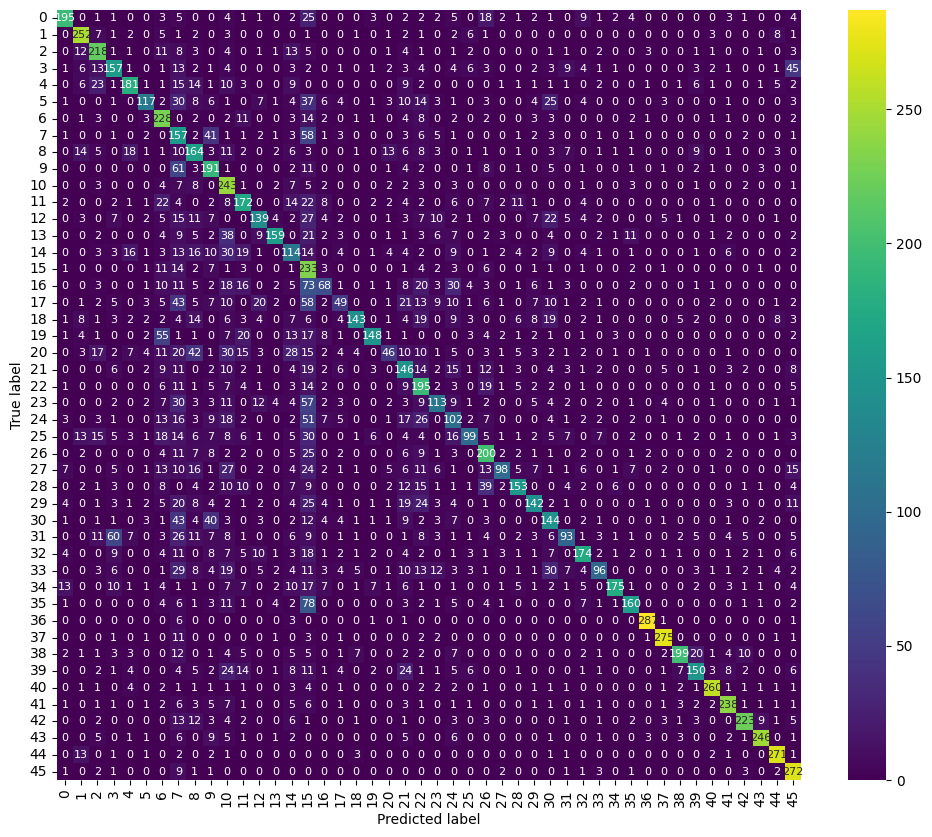

In [23]:
svctest_matrix = confusion_matrix(testtarget, svctestpred)

plt.figure(figsize=(12, 10))
sns.heatmap(svctest_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [34]:
mse = mean_squared_error(testtarget, svctestpred)
print("MSE:", mse)

print(classification_report(testtarget, svctestpred))

MSE: 104.91630434782608
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       300
           1       0.79      0.72      0.75       300
           2       0.74      0.55      0.63       300
           3       0.55      0.42      0.48       300
           4       0.64      0.71      0.67       300
           5       0.55      0.56      0.56       300
           6       0.58      0.66      0.61       300
           7       0.40      0.49      0.44       300
           8       0.53      0.46      0.49       300
           9       0.63      0.48      0.54       300
          10       0.59      0.74      0.66       300
          11       0.69      0.52      0.59       300
          12       0.54      0.44      0.48       300
          13       0.58      0.71      0.64       300
          14       0.54      0.42      0.47       300
          15       0.69      0.43      0.53       300
          16       0.34      0.55      0.42       300
   

<H3> Result on SVM</H3>
sklearn.SVC is too slow, so i using SGDClassifier, which approximates a linear SVM using stochastic gradient descent — much faster and scalable to large datasets.<br>

Hyperparameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}

1. Overall Accuracy<br>

	•	The model achieves ~70% accuracy on training and ~60% on test.<br>
	•	This gap shows some underfitting — the model learned general patterns but not enough to capture complex nonlinear handwriting variations.<br>
 	•	MSE ≈ 71.68 (train) and 104.9 (test). this indicates misclassifications across different categories, not just near misses.

2. Class-wise Observations<br>

	•	Some classes (like 36, 37, 44, 45) achieve very high precision and recall (≥0.9).<br>
	•	Others (like 16, 17, 24, 30) have F1-scores below 0.5, meaning these are harder to classify.<br>
	•	Some categories have high precision but low recall, meaning the classifier is conservative.<br>
	•	Others have low precision but higher recall, meaning the model is overgeneralizing to those labels.<br>

The SGDClassifier (linear SVM) achieved ~70% training accuracy and ~60% test accuracy on the Devanagari Handwritten Character Dataset. This demonstrates that while the model learned some global pixel patterns, its linear nature limited performance on complex, nonlinear character shapes. Class-level performance varied significantly, with simpler or distinct characters achieving F1-scores above 0.9, while visually similar ones fell below 0.5.


<h3> Improve SVM</h3>


In [6]:

pipe = Pipeline([
    ('scaler', scaler),
    ('pca', PCA(n_components=0.95, whiten=True, random_state=42)),
    ('sgd', SGDClassifier(random_state=114514, max_iter=5000, tol=1e-4))
])
param_grid = {
    'sgd__loss': ['hinge', 'log_loss'],       
    'sgd__alpha': [1e-4, 1e-3, 1e-2],     
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__learning_rate': ['optimal', 'adaptive'],  
    'sgd__eta0': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(train[:10000], target[:10000])

print("Best params:", grid.best_params_)
print("Train acc:", grid.best_estimator_.score(train, target))
print("Test acc:", grid.best_estimator_.score(test, testtarget))
#Best params: {'sgd__alpha': 0.001, 'sgd__eta0': 0.1, 'sgd__learning_rate': 'adaptive', 'sgd__loss': 'log_loss', 'sgd__penalty': 'l1'}
#Train acc: 0.6658951406649616
#Test acc: 0.663695652173913

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=optimal, sgd__loss=hinge, sgd__penalty=elasticnet; total time= 3.7min
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, sgd__penalty=l2; total time=  15.9s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, sgd__penalty=elasticnet; total time=  22.9s


/opt/homebrew/anaconda3/envs/tf215/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=optimal, sgd__loss=hinge, sgd__penalty=elasticnet; total time= 3.8min
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, sgd__penalty=l1; total time=  23.2s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=log_loss, sgd__penalty=l2; total time=  27.8s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=optimal, sgd__loss=log_loss, sgd__penalty=l2; total time= 3.5min
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, sgd__penalty=l2; total time=  17.6s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, sgd__penalty=l1; total time=  24.3s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=log_loss, sgd__penalty=l2; total time=  27.9s
[CV] END sgd__alpha=0.0001, sgd__eta0=0.001, sgd__learning_rate=optimal, sgd__loss=log_loss, sgd

In [23]:
bestpipe_model = grid.best_estimator_
bestpipe_trainpred = bestpipe_model.predict(train)
print("svc Accuracy:", accuracy_score(target, bestpipe_trainpred))

svc Accuracy: 0.6658951406649616


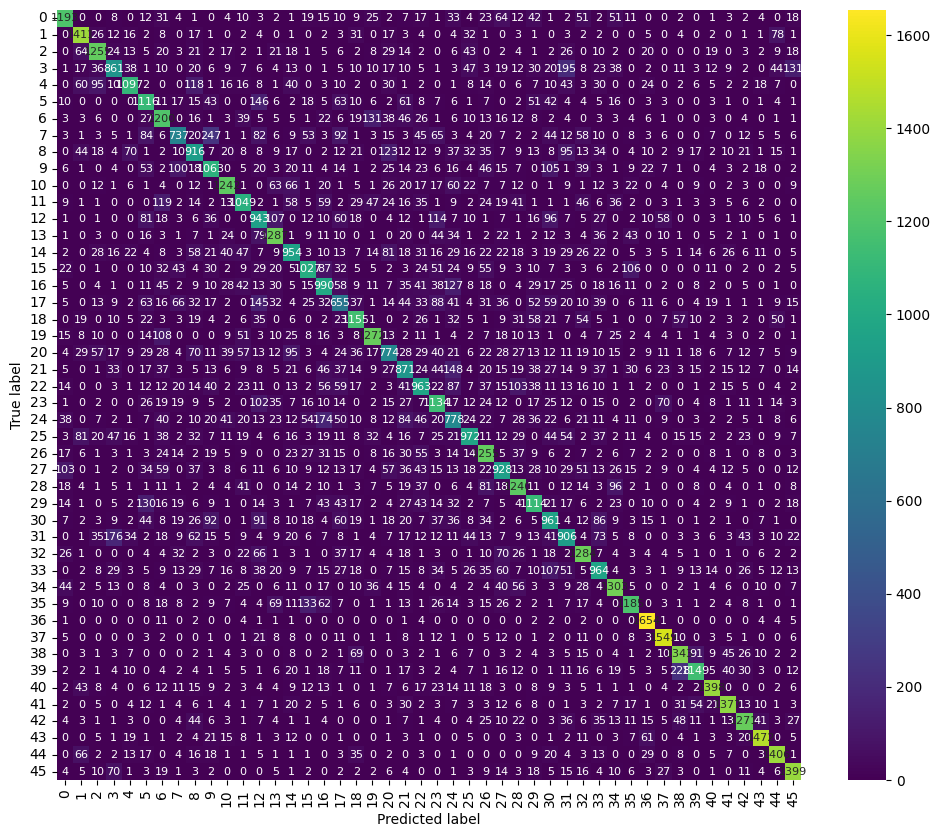

In [24]:
svcpipetrain_matrix = confusion_matrix(target, bestpipe_trainpred)

plt.figure(figsize=(12, 10))
sns.heatmap(svcpipetrain_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [25]:
mse = mean_squared_error(target, bestpipe_trainpred)
print("MSE:", mse)

print(classification_report(target, bestpipe_trainpred))

MSE: 89.00122762148338
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1700
           1       0.75      0.83      0.79      1700
           2       0.74      0.74      0.74      1700
           3       0.62      0.51      0.56      1700
           4       0.79      0.65      0.71      1700
           5       0.59      0.66      0.62      1700
           6       0.59      0.71      0.64      1700
           7       0.62      0.43      0.51      1700
           8       0.53      0.54      0.53      1700
           9       0.59      0.63      0.61      1700
          10       0.77      0.73      0.75      1700
          11       0.67      0.62      0.64      1700
          12       0.48      0.55      0.51      1700
          13       0.69      0.76      0.72      1700
          14       0.59      0.56      0.58      1700
          15       0.68      0.60      0.64      1700
          16       0.53      0.58      0.56      1700
    

In [26]:
bestpipe_testpred = bestpipe_model.predict(test)
print("svc Accuracy:", accuracy_score(testtarget, bestpipe_testpred))

svc Accuracy: 0.663695652173913


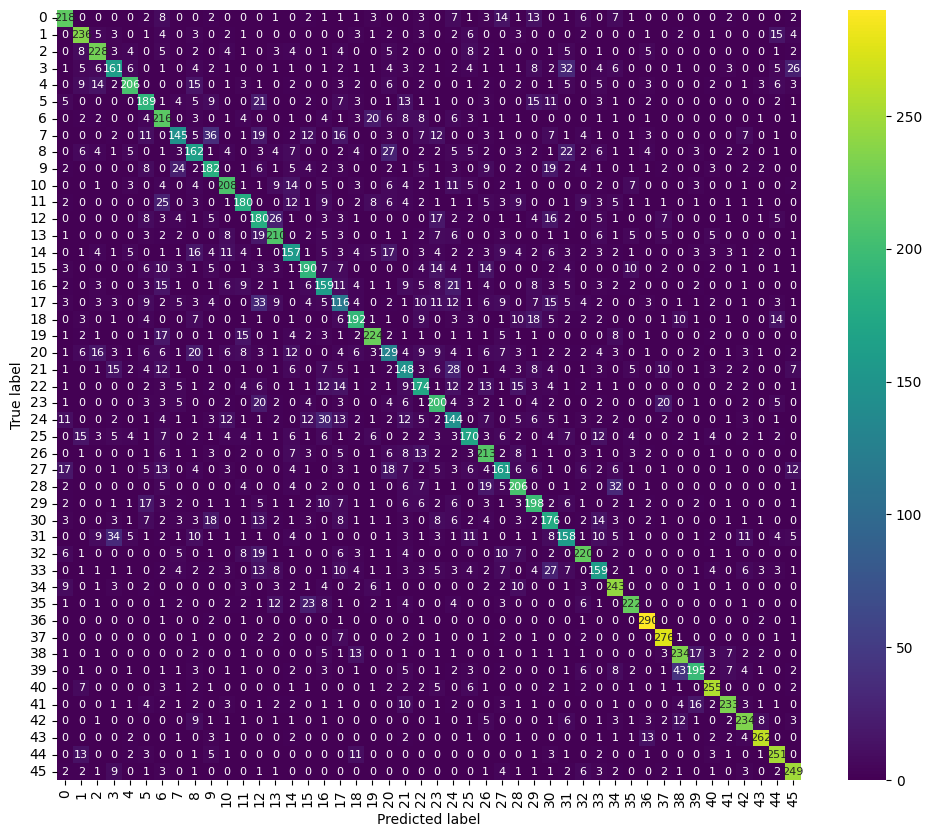

In [27]:
svcpipetest_matrix = confusion_matrix(testtarget, bestpipe_testpred)

plt.figure(figsize=(12, 10))
sns.heatmap(svcpipetest_matrix, annot=True, fmt="d", cmap="viridis", 
            annot_kws={"size":8})  
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
mse = mean_squared_error(testtarget, bestpipe_testpred)
print("MSE:", mse)

print(classification_report(testtarget, bestpipe_testpred))

MSE: 89.27210144927537
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       300
           1       0.74      0.79      0.76       300
           2       0.75      0.76      0.75       300
           3       0.63      0.54      0.58       300
           4       0.82      0.69      0.75       300
           5       0.62      0.63      0.62       300
           6       0.55      0.72      0.62       300
           7       0.64      0.48      0.55       300
           8       0.54      0.54      0.54       300
           9       0.61      0.61      0.61       300
          10       0.72      0.69      0.71       300
          11       0.68      0.60      0.64       300
          12       0.48      0.60      0.53       300
          13       0.68      0.70      0.69       300
          14       0.58      0.52      0.55       300
          15       0.68      0.63      0.66       300
          16       0.53      0.53      0.53       300
    

<H3> Result on SVM + PCA</H3> 

1. Overall<br>
	•	PCA reduced noise and improved generalization slightly (compare: SVM raw test ≈ 0.60 → SVM+PCA ≈ 0.66).<br>
	•	The smaller gap between train and test accuracy (≈0.66 vs 0.66) indicates less overfitting and better stability.<br>
 	•	MSE dropped significantly (104.9 → 89.3), confirming fewer large misclassifications.<br>
	•	The model is now balanced — neither overfitting nor heavily underfitting.<br>

2. Class-wise Behavior<br>
	•	Classes with clear geometric structure (like digits 36, 37, 44, 45) achieved F1 ≈ 0.9+, showing strong linear separability after PCA compression.
	•	Ambiguous or visually similar classes (16, 17, 24, 30) still struggle (F1 ≈ 0.4–0.5).
	•	PCA successfully improved generalization by focusing on the most informative features (top ~95% variance) while discarding noise.

PCA improved efficiency and generalization for the linear SVM without hurting performance.

Applying PCA to SVM features improved test accuracy by approximately 6%, reduced overfitting, and made training more efficient. The PCA-transformed model retained essential shape information while filtering noise, resulting in better generalization to unseen handwritten characters.

<h3> over all insight</h3>

	•	Random Forest captures complex nonlinear structures (curves, crossings, strokes) that SVMs can’t model linearly.
	•	SVM models focus on hyperplanes; they can only separate classes linearly in the PCA-reduced space.
	•	PCA helps SVM reach moderate accuracy, but its ceiling is still limited (~65–70%).
	•	Random Forest’s perfect training accuracy (1.0) and strong test accuracy (0.92) show that its variance control (through bagging) and nonlinear decision boundaries are well-suited for image classification.
 

<h2> Conclusion </h2>

In this project, multiple supervised learning models were applied to the Devanagari Handwritten Character Dataset to evaluate their ability to classify 46 different handwritten characters. The models included a Support Vector Machine (SVM) implemented via SGDClassifier, both with and without Principal Component Analysis (PCA), and a Random Forest classifier as a nonlinear ensemble baseline.

The baseline linear SVM trained on raw pixel features achieved approximately 70% training accuracy and 60% test accuracy, indicating mild overfitting. After applying PCA to retain 95% of the data variance, the SVM + PCA model achieved 66.6% training accuracy and 66.4% test accuracy, showing improved generalization and reduced error (MSE decreased from 104.9 to 89.3). PCA successfully filtered out noise and redundant information, enabling the model to focus on the most informative feature components. Although accuracy improved moderately, certain visually similar characters (e.g., tha, dha) remained challenging for the linear classifier due to the complex, nonlinear structure of handwritten strokes.

In comparison, the Random Forest model achieved a test accuracy of 92% and an almost perfect training accuracy of 100%, demonstrating its superior ability to capture nonlinear relationships and spatial patterns among pixels. While Random Forest offers the highest accuracy, the SVM + PCA model provides a computationally efficient alternative with acceptable generalization. Overall, ensemble-based methods outperform linear models for handwritten character recognition, but dimensionality reduction techniques like PCA remain valuable for improving efficiency and robustness in high dimensional datasets.
